In [1]:
import numpy as np
from pathlib import Path
from production import Problem, ExactSolver
from production.utils import get_mean_err
import matplotlib.pyplot as plt

In [2]:
experiment_path = Path("../data/loop_n_J_x_J_z_m")

In [3]:
energies = np.load(experiment_path / "energies.npy")

In [4]:
temperatures = np.concat([np.linspace(0.1, 10, 7), np.linspace(20, 100, 3)])
problems = [
    Problem(n_sites=8, J_x=2.2, J_z=1.0, temperature=t, m=6) for t in temperatures
]

In [5]:
exact_energies = [ExactSolver(pb).energy.real for pb in problems]

In [6]:
mean_energies, err_energies = get_mean_err(energies, True)

In [7]:
delta_taus = [pb.delta_tau for pb in problems][::-1]
exact_energies = exact_energies[::-1]

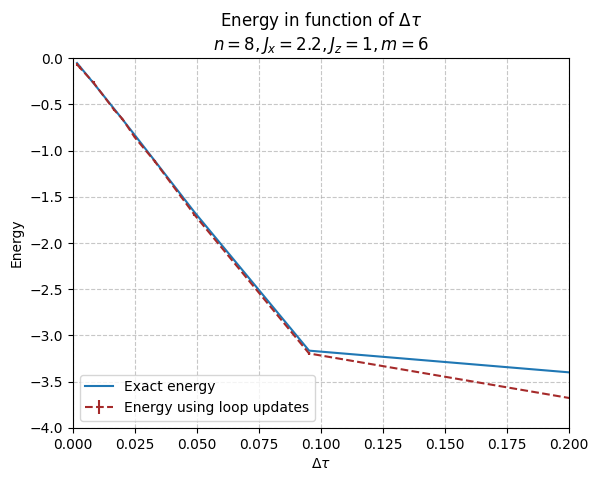

In [8]:
fig, ax = plt.subplots()
ax.set_title(r"Energy in function of $\Delta\tau$"
             "\n"
             r"$n=8, J_x=2.2, J_z=1, m=6$")
ax.plot(delta_taus, exact_energies, label="Exact energy")
ax.errorbar(delta_taus, mean_energies, err_energies, linestyle="dashed", label="Energy using loop updates", color="brown")
ax.set_xlabel(r"$\Delta\tau$")
ax.set_ylabel("Energy")
ax.legend(loc="lower left")
ax.set_xlim(0,0.2)
ax.set_ylim(-4,0)
ax.grid(linestyle='--', alpha=0.7)
fig.savefig(Path("../figures/energies_temperature.pdf"))
plt.show()